In [2]:
!pip install statsmodels seaborn

In [4]:
# Import Packages
import pandas as pd
import numpy as np
import dateutil
# Visualization
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# suppress the warning adding the following lines to the imports of your program
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
# ignore all warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)
sns.set_theme(color_codes=True)

In [56]:
# Retrieve the contents of the folder: data
url = "data"
url1 = "E:/"
# load the dataset
data = pd.read_csv("E:/DataSets/phone_data.csv")
#data = pd.read_csv("data/phone_data.csv")
# Display first 5 rows
data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [8]:
# Summary of the structure of the dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   month         830 non-null    object 
 5   network       830 non-null    object 
 6   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


In [10]:
#Check the number of unique value from all of the object datatype
data.select_dtypes(include='object').nunique()

date            747
item              3
month             5
network           9
network_type      6
dtype: int64

In [12]:
# Look for missing values
data.isna().any()

index           False
date            False
duration        False
item            False
month           False
network         False
network_type    False
dtype: bool

In [14]:
# Look for the count of the missing values of each attributes
data.isnull().sum()

index           0
date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [16]:
# Descriptive or Summary Statistics of the numeric columns
data.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


In [18]:
# Descriptive or Summary Statistics of the character columns
data.describe(include=['object'])

,date,item,month,network,network_type
count,830,830,830,830,830
unique,747,3,5,9,6
top,16/01/15 18:07,call,2014-11,Vodafone,mobile
freq,6,388,230,215,601


In [20]:
# Descriptive or Summary Statistics of all the columns
data.describe(include='all')

,index,date,duration,item,month,network,network_type
count,830.000000,830,830.000000,830,830,830,830
unique,NaN,747,NaN,3,5,9,6
top,NaN,16/01/15 18:07,NaN,call,2014-11,Vodafone,mobile
freq,NaN,6,NaN,388,230,215,601
mean,414.500000,NaN,117.804036,NaN,NaN,NaN,NaN
std,239.744656,NaN,444.129560,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,207.250000,NaN,1.000000,NaN,NaN,NaN,NaN
50%,414.500000,NaN,24.500000,NaN,NaN,NaN,NaN
75%,621.750000,NaN,55.000000,NaN,NaN,NaN,NaN


In [22]:
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse,
dayfirst=True)

In [24]:
# How many rows in the dataset
no_of_records=data['item'].count()
print("Number of Records: ",no_of_records)

Number of Records:  830


In [26]:
# What was the longest phone call / data entry?
longest_call=data['duration'].max()
print("Longest Phone Call: ",longest_call)

Longest Phone Call:  10528.0


In [28]:
# How many seconds of phone calls are recorded in total?
recorded_calls_secs=data['duration'][data['item'] == 'call'].sum()
print("Recorded Calls in Seconds: ",recorded_calls_secs)

Recorded Calls in Seconds:  92321.0


In [30]:
# How many entries are there for each month?
month_entries=data['month'].value_counts()
print("Month Entries are as follows:")
month_entries

Month Entries are as follows:


month
2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: count, dtype: int64

In [32]:
# Number of non-null unique network entries
unique_network_entries=data['network'].nunique()
print("Unique Network Entries: ",unique_network_entries)

Unique Network Entries:  9


In [36]:
# GroupBy options
print("Group By based on month: ",data.groupby(['month']).
groups.keys())
print("Group By based on month: ",len(data.groupby(['month']).
groups['2014-11']))
# Group By based on the given year and month
for key in data.groupby(['month']).groups.keys():
       print("Group By based on the year and month of",key,":",
           len(data.groupby(['month']).groups[key]))

Group By based on month:  dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])
Group By based on month:  230
Group By based on the year and month of 2014-11 : 230
Group By based on the year and month of 2014-12 : 157
Group By based on the year and month of 2015-01 : 205
Group By based on the year and month of 2015-02 : 137
Group By based on the year and month of 2015-03 : 101


In [38]:
# Get the first entry for each month
print("To Get the first entry for each month")
print(data.groupby('month').first())

To Get the first entry for each month
         index                date  duration  item   network network_type
month                                                                    
2014-11      0 2014-10-15 06:58:00    34.429  data      data         data
2014-12    228 2014-11-13 06:58:00    34.429  data      data         data
2015-01    381 2014-12-13 06:58:00    34.429  data      data         data
2015-02    577 2015-01-13 06:58:00    34.429  data      data         data
2015-03    729 2015-02-12 20:15:00    69.000  call  landline     landline


In [40]:
# Get the sum of the durations per month
print("To Get the sum of the durations per month")
print(data.groupby('month')['duration'].sum())

To Get the sum of the durations per month
month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64


In [42]:
# Get the number of dates / entries in each month
print("To Get the number of dates / entries in each month")
print(data.groupby('month')['date'].count())
result=data.groupby('month',as_index=False)['date'].count()
print(result)

To Get the number of dates / entries in each month
month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64
     month  date
0  2014-11   230
1  2014-12   157
2  2015-01   205
3  2015-02   137
4  2015-03   101


In [44]:
# What is the sum of durations, for calls only, to each network
print("To sum the durations, for calls only, to each network")
print(data[data['item'] == 'call'].groupby('network')['duration'].sum())
result=data[data['item'] == 'call'].groupby('network',as_index=False)['duration'].sum().reindex(columns=data.columns)
print(result.loc[result['duration']>0,['network','duration']])

To sum the durations, for calls only, to each network
network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64
     network  duration
0     Meteor    7200.0
1      Tesco   13828.0
2      Three   36464.0
3   Vodafone   14621.0
4   landline   18433.0
5  voicemail    1775.0


In [46]:
# To get the network that has a call duration greater than 10000
print("To get the network that has a call duration greater than 20000")
call_data=data[data['item'] == 'call'].groupby('network',as_index=False)['duration'].sum().reindex(columns=data.columns)
print(call_data.loc[call_data['duration']>10000,['network','duration']])

To get the network that has a call duration greater than 20000
    network  duration
1     Tesco   13828.0
2     Three   36464.0
3  Vodafone   14621.0
4  landline   18433.0


In [48]:
# How many calls, sms, and data entries are in each month?
print("Number of calls, sms, and data entries are in each month")
#print(data.groupby(['month', 'item'])['date'].count())
data.groupby(['month', 'item'])['date'].count()

Number of calls, sms, and data entries are in each month


month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

<Figure size 1000x1000 with 0 Axes>

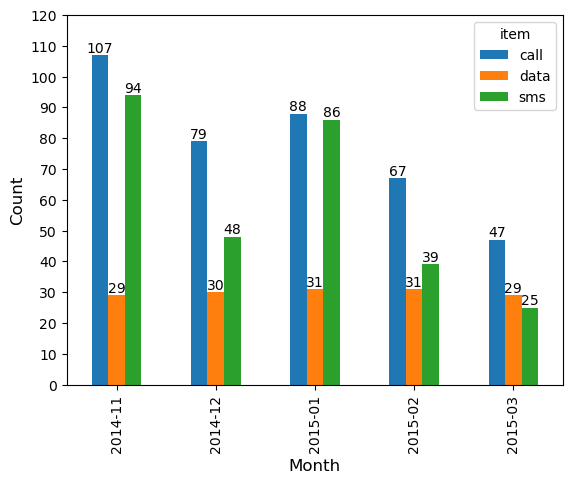

In [37]:
# Define the size of the graph
plt.figure(figsize=(10,10))

#data.groupby(['month', 'item'])['date'].count().unstack().plot.bar()
ax = data.groupby(['month', 'item'])['date'].count().unstack().plot.bar()
for c in ax.containers:
    #ax.bar_label(c, label_type='center',color='black')
    ax.bar_label(c, label_type='edge',color='black')
    
# Define x-axis range
plt.yticks(np.arange(0, 121, step=10))
# Define x-axis and y-axis labels
plt.xlabel ('Month', fontsize=12)
plt.ylabel ('Count', fontsize=12)

# save the graph into the file
plt.savefig('E:/DataSets/Phone-Data-Month-wise-items-graph.png', bbox_inches='tight',dpi=300)

# show plot
plt.show()

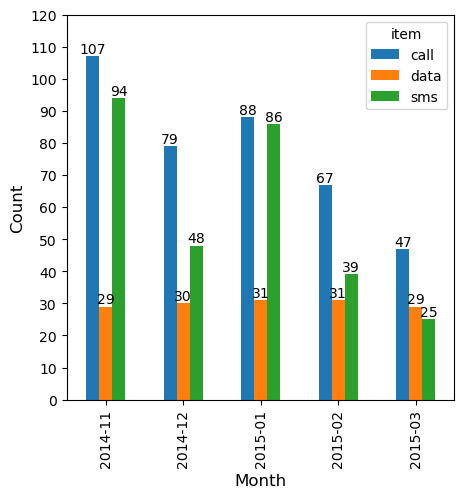

In [39]:
# Define the size of the graph
#plt.figure(figsize=(10,10))

df = data.groupby(['month', 'item'])['date'].count().unstack(level=1)
ax = df.plot(kind = 'bar', figsize=(5,5))

for c in ax.containers:
    #ax.bar_label(c, label_type='center',color='black')
    ax.bar_label(c, label_type='edge',color='black')
    
# Define x-axis range
plt.yticks(np.arange(0, 121, step=10))
# Define x-axis and y-axis labels
plt.xlabel ('Month', fontsize=12)
plt.ylabel ('Count', fontsize=12)

# save the graph into the file
plt.savefig('E:/DataSets/Phone-Data-Month-wise-items-graph1.png',bbox_inches='tight', dpi=300)

# show plot
plt.show()

<Figure size 1000x1000 with 0 Axes>

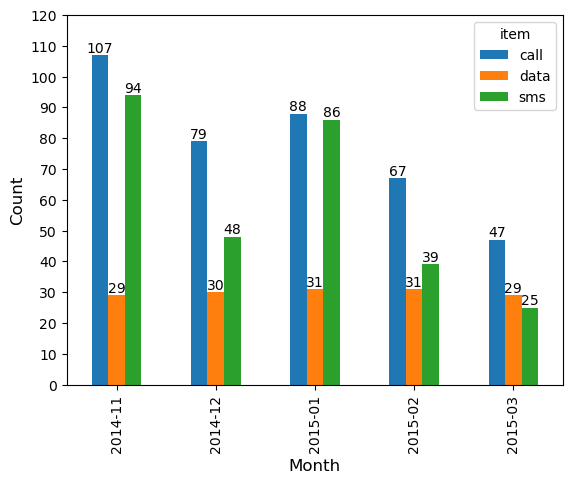

In [33]:
# Import Packages
import pandas as pd
import numpy as np
import dateutil

# Visualization
import matplotlib.pyplot as plt

# suppress the warning adding the following lines to the imports of your program
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

# load the dataset
data = pd.read_csv("E:/DataSets/phone_data.csv")
# Display first 5 rows
data.head()

# Define the size of the graph
plt.figure(figsize=(10,10))

#data.groupby(['month', 'item'])['date'].count().unstack().plot.bar()
ax = data.groupby(['month', 'item'])['date'].count().unstack().plot.bar()
for c in ax.containers:
    #ax.bar_label(c, label_type='center',color='black')
    ax.bar_label(c, label_type='edge',color='black')
    
# Define x-axis range
plt.yticks(np.arange(0, 121, step=10))
# Define x-axis and y-axis labels
plt.xlabel ('Month', fontsize=12)
plt.ylabel ('Count', fontsize=12)

# save the graph into the file
plt.savefig('E:/DataSets/Phone-Data-Month-wise-items-graph.png',bbox_inches='tight', dpi=300)

# show plot
plt.show()


